In [2]:
!pip install torch fastai==2.4 transformers==4.10.2 BentoML==0.13.1

     |████████████████████████████████| 187 kB 8.2 MB/s 
     |████████████████████████████████| 2.8 MB 74.1 MB/s 
     |████████████████████████████████| 4.0 MB 58.2 MB/s 
     |████████████████████████████████| 831.4 MB 6.9 kB/s 
     |████████████████████████████████| 55 kB 5.4 MB/s 
     |████████████████████████████████| 596 kB 69.3 MB/s 
     |████████████████████████████████| 77 kB 7.6 MB/s 
     |████████████████████████████████| 3.3 MB 51.0 MB/s 
     |████████████████████████████████| 880 kB 67.4 MB/s 
     |████████████████████████████████| 1.1 MB 66.5 MB/s 
     |████████████████████████████████| 210 kB 98.9 MB/s 
     |████████████████████████████████| 79 kB 8.9 MB/s 
     |████████████████████████████████| 86 kB 7.2 MB/s 
     |████████████████████████████████| 132 kB 97.7 MB/s 
     |████████████████████████████████| 131 kB 103.2 MB/s 
     |████████████████████████████████| 1.3 MB 68.1 MB/s 
     |████████████████████████████████| 146 kB 98.0 MB/s 
     |███████████████

In [3]:
!nvidia-smi

Tue May 10 05:23:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import sys
sys.path.append('drive/My Drive/')

In [6]:
import torch
import transformers
from transformers import AutoModelWithLMHead, PreTrainedTokenizerFast
from fastai.text.all import *
import fastai
import re

print(torch.__version__)
print(transformers.__version__)
print( fastai.__version__)
print(torch.cuda.is_available())

1.9.1+cu102
4.10.2
2.4
True


In [7]:
#download model and tokenizer
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
  bos_token='</s>', eos_token='</s>', unk_token='<unk>',
  pad_token='<pad>', mask_token='<mask>') 
model = AutoModelWithLMHead.from_pretrained("skt/kogpt2-base-v2")

#test tokenizer
print(tokenizer.tokenize("안녕하세요. 한국어 GPT-2 입니다.😤:)l^o"))

#test model ouput
text = """위치추적 전자장치(전자발찌) 훼손 전후로 여성 2명을 잇달아 살해한 """
input_ids = tokenizer.encode(text)
gen_ids = model.generate(torch.tensor([input_ids]),
                           max_length=128,
                           repetition_penalty=2.0,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           use_cache=True
                        )
generated = tokenizer.decode(gen_ids[0,:].tolist())
print(generated)

Downloading:   0%|          | 0.00/2.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:592: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Downloading:   0%|          | 0.00/513M [00:00<?, ?B/s]

['▁안녕', '하', '세', '요.', '▁한국어', '▁G', 'P', 'T', '-2', '▁입', '니다.', '😤', ':)', 'l^o']
위치추적 전자장치(전자발찌) 훼손 전후로 여성 2명을 잇달아 살해한 ᄋ씨(33)에 대해 구속영장을 신청했다.
경찰에 따르면 ᄀ씨는 지난달 29일 오후 9시30분쯤 서울 강남구 논현동 자신의 집에서 ᄂ씨를 흉기로 찔러 숨지게 한 혐의를 받고 있다.
ᄀ씨의 범행은 B씨가 “여자친구가 있다”며 경찰에 신고하면서 드러났다.
B씨도 같은 날 오전 10시경 경찰서에 자진출석해 조사를 받았다.
ᄂ씨와 함께 있던 ᄃ(31·여)은 이날 새벽 1시까지 조사에서 “내가 여자 친구와 사귀고 있어 괴롭다”고 진술했다.</d> 부산시는 오는 10월까지 '부산형


In [8]:
with open('drive/My Drive/MyData.txt', encoding='UTF-8') as f:
    lines = f.read()
lines=" ".join(lines.split())
len(lines)

4158013

In [ ]:
lines=re.sub('\(계속\).*?[●○]', '', lines)
lines=re.sub('[●○]', '', lines)
len(lines)

11402895

In [9]:
#model input output tokenizer
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

#split data
train=lines[:int(len(lines)*0.9)]
test=lines[int(len(lines)*0.9):]
splits = [[0],[1]]

#init dataloader
tls = TfmdLists([train,test], TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
batch,seq_len = 8,256
dls = tls.dataloaders(bs=batch, seq_len=seq_len)
# dls.show_batch(max_n=2)

SuggestedLRs(valley=tensor(8.3176e-06))


epoch,train_loss,valid_loss,perplexity,time
0,3.805800,3.925542,50.680557,05:04
1,3.802695,3.926805,50.744579,05:04
2,3.794415,3.929406,50.876743,05:04
3,3.777670,3.931174,50.966766,05:04
4,3.746158,3.934670,51.145256,05:04
5,3.712349,3.939874,51.412132,05:04
6,3.667169,3.949033,51.885159,05:04
7,3.621894,3.959576,52.435081,05:04
8,3.573759,3.965753,52.759987,05:04
9,3.529125,3.977556,53.386372,05:04


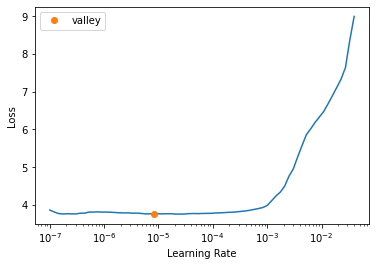

In [14]:
#gpt2 ouput is tuple, we need just one val
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]
        
        
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()
lr=learn.lr_find()
print(lr)
learn.fit_one_cycle(30, lr)
# learn.fine_tune(3)

In [15]:
prompt="위치추적 전자장치(전자발찌) 훼손 전후로 여성 2명을 잇달아 살해한 "
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
preds = learn.model.generate(inp,
                           max_length=128,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           repetition_penalty=2.0,       
                           use_cache=True
                          ) 
tokenizer.decode(preds[0].cpu().numpy())



'위치추적 전자장치(전자발찌) 훼손 전후로 여성 2명을 잇달아 살해한 죗값은 어떻게 보상해야 할까요. 자~ 이거 뭐야? 아유 미안해. 죄송합니다. 저희도 다 알고 있어요라고 얘기했어요. 그런데 이제 그게 아니라 제가 한 일 년 반 전에 네네. 어머님한테 전화를 했더니 어머니가 너무 무서우시니까 전화 안 받으세요가래서 그래서 내가 왜 이러는지 모르겠다. 그냥 어머니랑 통화할 때 이렇게 하고 있는데 갑자기 여기가 눈이 충혈되면서 눈물이 나더라구 예예 알겠습니다. 근데 그때는'

In [16]:
learn.model.save_pretrained('drive/My Drive/')
# model.push_to_hub("kogpt2test")
# tokenizer.push_to_hub("kogpt2test")